Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
import string
import matplotlib

In [2]:
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

In [3]:
names=inaugural.fileids()
print(len(names))

59


In [4]:
names[0],names[58]


('1789-Washington.txt', '2021-Biden.txt')

In [5]:
president_1 = inaugural.raw('1941-Roosevelt.txt')
president_2 = inaugural.raw('1961-Kennedy.txt')
president_3 = inaugural.raw('1973-Nixon.txt')

In [6]:
president = president_1 + president_2 + president_3

In [10]:
roosevelt_words=list(inaugural.words('1941-Roosevelt.txt'))
words = len(inaugural.words('1941-Roosevelt.txt'))
punct = list(string.punctuation)
punct.extend(["--", ".", ","])
all_words_roosevelt = (x.lower() for x in roosevelt_words)
all_words_roosevelt_no_punct = [word for word in all_words_roosevelt if word not in punct]

print('The number of words in Roosevelt speech is: ', words)
print('The number of words in Roosevelt speech without punctuation is: ', len(all_words_roosevelt_no_punct))
print('The number of characters in Roosevelt speech is: ', len(president_1))
print('The number of sentences in Roosevelt speech is: ', len(inaugural.sents('1941-Roosevelt.txt')))

The number of words in Roosevelt speech is:  1536
The number of words in Roosevelt speech without punctuation is:  1351
The number of characters in Roosevelt speech is:  7571
The number of sentences in Roosevelt speech is:  68


In [11]:
kennedy_words=list(inaugural.words('1961-Kennedy.txt'))
words = len(inaugural.words('1961-Kennedy.txt'))
all_words_kennedy = (x.lower() for x in kennedy_words)
all_words_kennedy_no_punct = [word for word in all_words_kennedy if word not in punct]

print('The number of words in Kennedy speech is: ', words)
print('The number of words in Kennedy speech without punctuation is: ', len(all_words_kennedy_no_punct))
print('The number of characters in Kennedy speech is: ', len(president_2))
print('The number of sentences in Kennedy speech is: ', len(inaugural.sents('1961-Kennedy.txt')))

The number of words in Kennedy speech is:  1546
The number of words in Kennedy speech without punctuation is:  1372
The number of characters in Kennedy speech is:  7618
The number of sentences in Kennedy speech is:  52


In [12]:
nixon_words=list(inaugural.words('1973-Nixon.txt'))
words = len(inaugural.words('1973-Nixon.txt'))
all_words_nixon = (x.lower() for x in nixon_words)
all_words_nixon_no_punct = [word for word in all_words_nixon if word not in punct]

print('The number of words in Nixon speech is: ', words)
print('The number of words in Nixon speech without punctuation is: ', len(all_words_nixon_no_punct))
print('The number of characters in Nixon speech is: ', len(president_3))
print('The number of sentences in Nixon speech is: ', len(inaugural.sents('1973-Nixon.txt')))

The number of words in Nixon speech is:  2028
The number of words in Nixon speech without punctuation is:  1820
The number of characters in Nixon speech is:  9991
The number of sentences in Nixon speech is:  69


2.2 Remove all the stopwords from all three speeches. – 3 Marks



In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [14]:
roosevelt_words=list(inaugural.words('1941-Roosevelt.txt'))
roosevelt_words

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in'

In [15]:
all_words_roosevelt_no_punct

['on',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'united',
 'states',
 'in',
 'washington',
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 'in',
 'lincoln',
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'nation',
 'from',
 'disruption',
 'from',
 'within',
 'in',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 'to',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in',
 'history',
 'has',
 'been',
 'and',
 'to',
 'rediscover',


In [17]:
kennedy_words=list(inaugural.words('1961-Kennedy.txt'))
kennedy_words

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 

In [18]:
all_words_kennedy_no_punct

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 'symbolizing',
 'an',
 'end',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 'signifying',
 'renewal',
 'as',
 'well',
 'as',
 'change',
 'for',
 'i',
 'have',
 'sworn',
 'i',
 'before',
 'you',
 'and',
 'almighty',
 'god',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 'the',
 'world',
 'is',
 'very',
 'different',
 'now',
 'for',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 'human',
 'poverty',
 'and',
 'all',
 'forms',
 'of',
 'human',
 'life',
 'and',
 'yet',
 'the',
 'same',
 're

In [20]:
nixon_words=list(inaugural.words('1973-Nixon.txt'))
nixon_words

['Mr',
 '.',
 'Vice',
 'President',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs',
 '.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

In [21]:
all_words_nixon_no_punct

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 'when',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 'america',
 'was',
 'bleak',
 'in',
 'spirit',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 'as',
 'we',
 'meet',
 'here',
 'today',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 'the',
 'central',
 'question',
 'before',
 'us',
 'is',
 'how',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 'let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 'what',
 'other',
 'postwar',
 'periods',
 'have',
 'so',
 'often',
 'been',
 'a',
 'time',
 'of',
 're

In [23]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--", ".", ","])
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
all_words_roosevelt = (x.lower() for x in roosevelt_words)
all_words_clean_roosevelt = [word for word in all_words_roosevelt if word not in stopwords]
all_words_freq_roosevelt = nltk.FreqDist(all_words_clean_roosevelt)
word_features_roosevelt = [item[0] for item in all_words_freq_roosevelt.most_common(2000)]
print('Word count before removal of stopwords in Roosevelt speech:',len(all_words_roosevelt_no_punct))
print('Word count after removal of stopwords in Roosevelt speech:',len(all_words_clean_roosevelt))

Word count before removal of stopwords in Roosevelt speech: 1351
Word count after removal of stopwords in Roosevelt speech: 632


In [25]:
roosevelt_sentence = " ".join(all_words_clean_roosevelt)
print('Sample sentence: ',roosevelt_sentence)

Sample sentence:  national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measure

In [44]:
all_words_kennedy = (x.lower() for x in kennedy_words)
all_words_clean_kennedy = [word for word in all_words_kennedy if word not in stopwords]
all_words_freq_kennedy = nltk.FreqDist(all_words_clean_kennedy)
word_features_kennedy = [item[0] for item in all_words_freq_kennedy.most_common(2000)]
print('Word count before removal of stopwords in Kennedy speech:',len(all_words_kennedy_no_punct))
print('Word count after removal of stopwords in Kennedy speech:',len(all_words_clean_kennedy))

Word count before removal of stopwords in Kennedy speech: 1372
Word count after removal of stopwords in Kennedy speech: 697


In [27]:
kennedy_sentence = " ".join(all_words_clean_kennedy)
print('Sample sentence: ',kennedy_sentence)

Sample sentence:  vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order

In [43]:
all_words_nixon = (x.lower() for x in nixon_words)
all_words_clean_nixon = [word for word in all_words_nixon if word not in stopwords]
all_words_freq_nixon = nltk.FreqDist(all_words_clean_nixon)
word_features_nixon = [item[0] for item in all_words_freq_nixon.most_common(2000)]
print('Word count before removal of stopwords in Nixon speech:',len(all_words_nixon_no_punct))
print('Word count after removal of stopwords in Nixon speech:',len(all_words_clean_nixon))

Word count before removal of stopwords in Nixon speech: 1820
Word count after removal of stopwords in Nixon speech: 836


In [29]:
nixon_sentence = " ".join(all_words_clean_nixon)
print('Sample sentence: ',nixon_sentence)

Sample sentence:  mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand nece

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

In [30]:
nltk.FreqDist(all_words_clean_roosevelt).most_common(10)

[('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9),
 ('us', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

In [31]:
print('The top three words in President Roosevelt speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_roosevelt).most_common(5))

The top three words in President Roosevelt speech after removing stop words are: 
 [('nation', 12), ('know', 10), ('spirit', 9), ('life', 9), ('democracy', 9)]


In [32]:
nltk.FreqDist(all_words_clean_kennedy).most_common(10)

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

In [33]:
print('The top three words in President Kennedy speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_kennedy).most_common(3))

The top three words in President Kennedy speech after removing stop words are: 
 [('let', 16), ('us', 12), ('world', 8)]


In [34]:
nltk.FreqDist(all_words_clean_nixon).most_common(10)

[('us', 26),
 ('let', 22),
 ('america', 21),
 ('peace', 19),
 ('world', 18),
 ('new', 15),
 ('nation', 11),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9)]

In [35]:
print('The top three words in President Nixon speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_nixon).most_common(3))

The top three words in President Nixon speech after removing stop words are: 
 [('us', 26), ('let', 22), ('america', 21)]


2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

In [36]:
from wordcloud import WordCloud

In [37]:
text_roosevelt = ' '.join(all_words_clean_roosevelt)

In [38]:
wordcloud_roosevelt = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_roosevelt)

Word Cloud for President Roosevelt speech


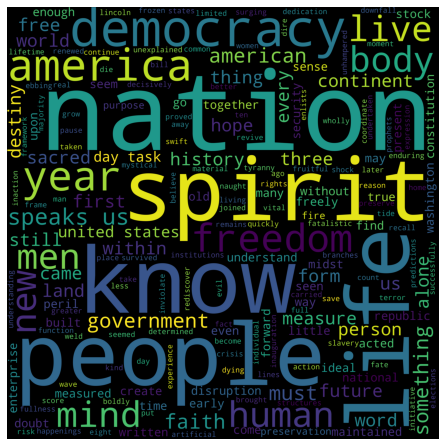

In [39]:
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_roosevelt) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Roosevelt speech")
plt.show()


In [314]:
text_kennedy = ' '.join(all_words_clean_kennedy)

In [315]:
wordcloud_kennedy = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_kennedy)


Word Cloud for President Kennedy speech


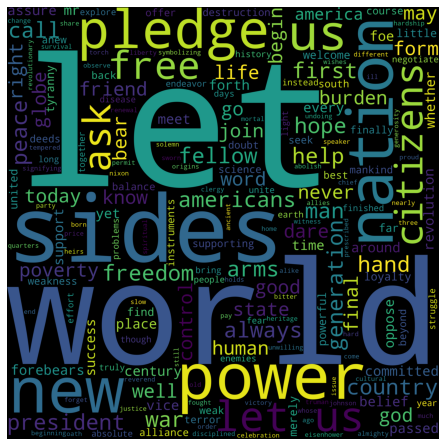

In [316]:
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_kennedy) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Kennedy speech")
plt.show()

In [317]:
text_nixon = ' '.join(all_words_clean_nixon)

In [318]:
wordcloud_nixon = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_nixon)


Word Cloud for President Nixon speech


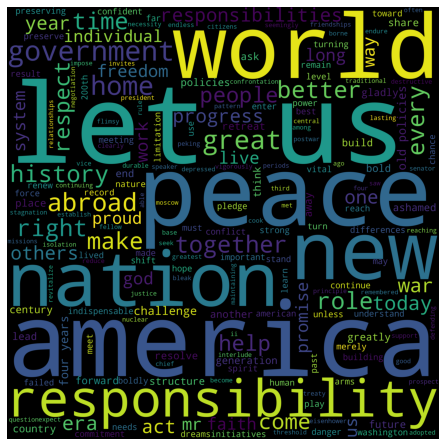

In [319]:
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_nixon) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Nixon speech")
plt.show()

In [ ]:
Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

(Hint: use .words(), .raw(), .sent() for extracting counts)

import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
import string
import matplotlib

nltk.download('inaugural')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

names=inaugural.fileids()
print(len(names))

names[0],names[58]


president_1 = inaugural.raw('1941-Roosevelt.txt')
president_2 = inaugural.raw('1961-Kennedy.txt')
president_3 = inaugural.raw('1973-Nixon.txt')

president = president_1 + president_2 + president_3

roosevelt_words=list(inaugural.words('1941-Roosevelt.txt'))
words = len(inaugural.words('1941-Roosevelt.txt'))
punct = list(string.punctuation)
punct.extend(["--", ".", ","])
all_words_roosevelt = (x.lower() for x in roosevelt_words)
all_words_roosevelt_no_punct = [word for word in all_words_roosevelt if word not in punct]

print('The number of words in Roosevelt speech is: ', words)
print('The number of words in Roosevelt speech without punctuation is: ', len(all_words_roosevelt_no_punct))
print('The number of characters in Roosevelt speech is: ', len(president_1))
print('The number of sentences in Roosevelt speech is: ', len(inaugural.sents('1941-Roosevelt.txt')))

kennedy_words=list(inaugural.words('1961-Kennedy.txt'))
words = len(inaugural.words('1961-Kennedy.txt'))
all_words_kennedy = (x.lower() for x in kennedy_words)
all_words_kennedy_no_punct = [word for word in all_words_kennedy if word not in punct]

print('The number of words in Kennedy speech is: ', words)
print('The number of words in Kennedy speech without punctuation is: ', len(all_words_kennedy_no_punct))
print('The number of characters in Kennedy speech is: ', len(president_2))
print('The number of sentences in Kennedy speech is: ', len(inaugural.sents('1961-Kennedy.txt')))

nixon_words=list(inaugural.words('1973-Nixon.txt'))
words = len(inaugural.words('1973-Nixon.txt'))
all_words_nixon = (x.lower() for x in nixon_words)
all_words_nixon_no_punct = [word for word in all_words_nixon if word not in punct]

print('The number of words in Nixon speech is: ', words)
print('The number of words in Nixon speech without punctuation is: ', len(all_words_nixon_no_punct))
print('The number of characters in Nixon speech is: ', len(president_3))
print('The number of sentences in Nixon speech is: ', len(inaugural.sents('1973-Nixon.txt')))

2.2 Remove all the stopwords from all three speeches. – 3 Marks



from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

roosevelt_words=list(inaugural.words('1941-Roosevelt.txt'))
roosevelt_words

all_words_roosevelt_no_punct

kennedy_words=list(inaugural.words('1961-Kennedy.txt'))
kennedy_words

all_words_kennedy_no_punct

nixon_words=list(inaugural.words('1973-Nixon.txt'))
nixon_words

all_words_nixon_no_punct

stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--", ".", ","])
stopwords

all_words_roosevelt = (x.lower() for x in roosevelt_words)
all_words_clean_roosevelt = [word for word in all_words_roosevelt if word not in stopwords]
all_words_freq_roosevelt = nltk.FreqDist(all_words_clean_roosevelt)
word_features_roosevelt = [item[0] for item in all_words_freq_roosevelt.most_common(2000)]
print('Word count before removal of stopwords in Roosevelt speech:',len(all_words_roosevelt_no_punct))
print('Word count after removal of stopwords in Roosevelt speech:',len(all_words_clean_roosevelt))

roosevelt_sentence = " ".join(all_words_clean_roosevelt)
print('Sample sentence: ',roosevelt_sentence)

all_words_kennedy = (x.lower() for x in kennedy_words)
all_words_clean_kennedy = [word for word in all_words_kennedy if word not in stopwords]
all_words_freq_kennedy = nltk.FreqDist(all_words_clean_kennedy)
word_features_kennedy = [item[0] for item in all_words_freq_kennedy.most_common(2000)]
print('Word count before removal of stopwords in Kennedy speech:',len(all_words_kennedy_no_punct))
print('Word count after removal of stopwords in Kennedy speech:',len(all_words_clean_kennedy))

kennedy_sentence = " ".join(all_words_clean_kennedy)
print('Sample sentence: ',kennedy_sentence)

all_words_nixon = (x.lower() for x in nixon_words)
all_words_clean_nixon = [word for word in all_words_nixon if word not in stopwords]
all_words_freq_nixon = nltk.FreqDist(all_words_clean_nixon)
word_features_nixon = [item[0] for item in all_words_freq_nixon.most_common(2000)]
print('Word count before removal of stopwords in Nixon speech:',len(all_words_nixon_no_punct))
print('Word count after removal of stopwords in Nixon speech:',len(all_words_clean_nixon))

nixon_sentence = " ".join(all_words_clean_nixon)
print('Sample sentence: ',nixon_sentence)

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

nltk.FreqDist(all_words_clean_roosevelt).most_common(10)

print('The top three words in President Roosevelt speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_roosevelt).most_common(5))

nltk.FreqDist(all_words_clean_kennedy).most_common(10)

print('The top three words in President Kennedy speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_kennedy).most_common(3))

nltk.FreqDist(all_words_clean_nixon).most_common(10)

print('The top three words in President Nixon speech after removing stop words are: \n', nltk.FreqDist(all_words_clean_nixon).most_common(3))

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

from wordcloud import WordCloud

text_roosevelt = ' '.join(all_words_clean_roosevelt)

wordcloud_roosevelt = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_roosevelt)

plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_roosevelt) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Roosevelt speech")
plt.show()


text_kennedy = ' '.join(all_words_clean_kennedy)

wordcloud_kennedy = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_kennedy)


plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_kennedy) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Kennedy speech")
plt.show()

text_nixon = ' '.join(all_words_clean_nixon)

wordcloud_nixon = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(text_nixon)


plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud_nixon) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Nixon speech")
plt.show()

